# Importing necessary libraries for image processing, machine learning, and deep learning tasks.


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import datasets
import hashlib
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Mounting Google Drive to access files stored in the cloud.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Defining the path to the Sorted MNIST dataset stored in Google Drive.


In [ ]:
dataset_path = '/content/drive/My Drive/Sorted MNIST Dataset'

# List files and directories in the folder
print(os.listdir(dataset_path))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Function to count images per class, display total counts, and show random sample images from the Sorted MNIST dataset.


In [ ]:
# Function to count images and show some sample images
def count_and_show_images(dataset_path):
    total_images = 0
    class_counts = {}

    # Loop through each class folder (0 to 9)
    for label in range(10):  # 0 to 9
        label_path = os.path.join(dataset_path, str(label))

        # Check if the folder exists
        if os.path.exists(label_path):
            images_in_class = len(os.listdir(label_path))  # Count images in each class
            class_counts[label] = images_in_class
            total_images += images_in_class
        else:
            print(f"Warning: {label_path} not found!")

    # Print total count of images
    print(f"Total number of images: {total_images}")

    # Display the count of images per class
    for label, count in class_counts.items():
        print(f"Class {label}: {count} images")

    # Show sample images
    show_sample_images(dataset_path, num_images=10)

def show_sample_images(dataset_path, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in enumerate(axes):
        label = np.random.randint(0, 10)  # Randomly pick a label from 0 to 9
        label_path = os.path.join(dataset_path, str(label))
        img_path = os.path.join(label_path, np.random.choice(os.listdir(label_path)))
        img = Image.open(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

# Count and show images

Total number of images: 70000
Class 0: 7000 images
Class 1: 7000 images
Class 2: 7000 images
Class 3: 7000 images
Class 4: 7000 images
Class 5: 7000 images
Class 6: 7000 images
Class 7: 7000 images
Class 8: 7000 images
Class 9: 7000 images


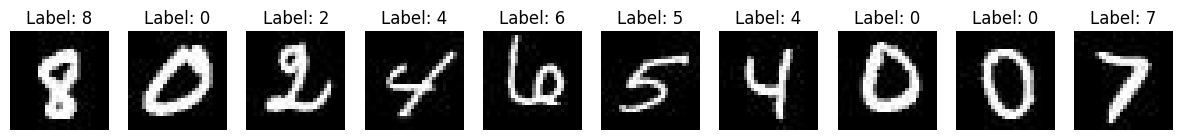

In [ ]:
count_and_show_images(dataset_path)

# Function to load image file paths and corresponding labels from the Sorted MNIST dataset.


In [ ]:
# Function to load and prepare image paths and labels
def load_image_paths_and_labels(dataset_path):
    image_paths = []
    labels = []

    # Loop through each class folder (0 to 9)
    for label in range(10):
        label_path = os.path.join(dataset_path, str(label))

        # Check if the folder exists
        if os.path.exists(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                image_paths.append(img_path)
                labels.append(label)
        else:
            print(f"Warning: {label_path} not found!")

    return image_paths, labels

# Load image paths and labels
image_paths, labels = load_image_paths_and_labels(dataset_path)


# Split dataset into 80% training and 20% testing

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=2, stratify=labels
)

# Print number of images in training and testing sets
print(f"Total number of training images: {len(train_images)}")
print(f"Total number of testing images: {len(test_images)}")


Total number of training images: 56000
Total number of testing images: 14000


# Function to visualize sample images from a given list of image paths for both training and testing datasets.


Sample Training Images:


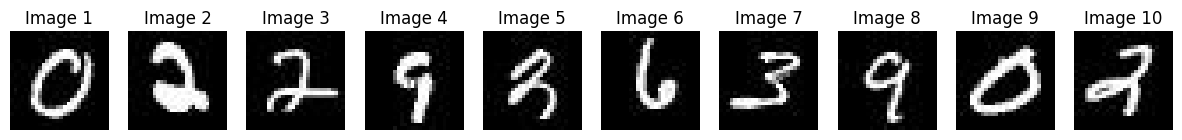

Sample Testing Images:


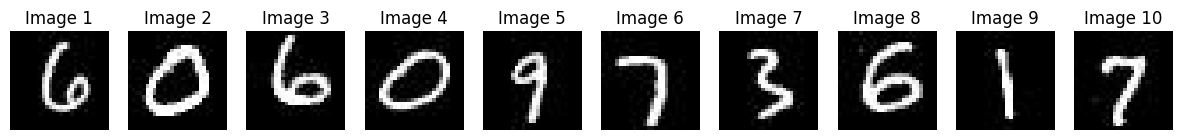

In [ ]:
# Function to display sample images from a list of image paths
def show_sample_images_from_list(image_paths, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in enumerate(axes):
        img_path = image_paths[i]
        img = Image.open(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Image {i+1}')
        ax.axis('off')
    plt.show()

# Show sample training images
print("Sample Training Images:")
show_sample_images_from_list(train_images, num_images=10)

# Show sample testing images
print("Sample Testing Images:")
show_sample_images_from_list(test_images, num_images=10)


## Function to load and normalize a subset of images from the Sorted MNIST dataset, then flatten them for model training.


In [ ]:
# Function to load images from the dataset
def load_images(dataset_path, subset_size=7000):
    images = []
    labels = []

    # Randomly sample files from each class (0-9 for MNIST)
    for label in range(10):
        label_path = os.path.join(dataset_path, str(label))
        all_images = os.listdir(label_path)

        # Sample a subset of the images for each class
        sampled_images = np.random.choice(all_images, size=subset_size // 10, replace=False)

        for img_name in sampled_images:
            img_path = os.path.join(label_path, img_name)
            img = Image.open(img_path)  # No need for resizing or conversion to grayscale
            images.append(np.array(img) / 255.0)  # Normalize image to [0, 1]
            labels.append(label)

    return np.array(images), np.array(labels)

# Load a smaller subset of the dataset (7,000 images)
dataset_path = '/content/drive/My Drive/Sorted MNIST Dataset'
X, y = load_images(dataset_path, subset_size=7000)
print(f"Loaded {len(X)} images.")

# Flatten the images from 28x28 to 784 (required for Logistic Regression)
X_flattened = X.reshape(X.shape[0], -1)

Loaded 7000 images.


# Save images and labels in a compressed file

In [ ]:
save_path = '/content/drive/My Drive/sampled_mnist.npz'
np.savez_compressed(save_path, X=X, y=y)

print(f"Dataset saved successfully at {save_path}!")

Dataset saved successfully at /content/drive/My Drive/sampled_mnist.npz!


# Load dataset from saved .npz file

In [ ]:
load_path = '/content/drive/My Drive/sampled_mnist.npz'
data = np.load(load_path)

X, y = data['X'], data['y']

print(f"Loaded {len(X)} images from saved dataset.")


Loaded 7000 images from saved dataset.


# Applying PCA to reduce dimensionality while retaining 95% of variance in the dataset.


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_flattened)

# Print Feature Reduction
print(f"Original number of features: {X_flattened.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")


Original number of features: 784
Reduced number of features after PCA: 156


# Plot Explained Variance Ratio

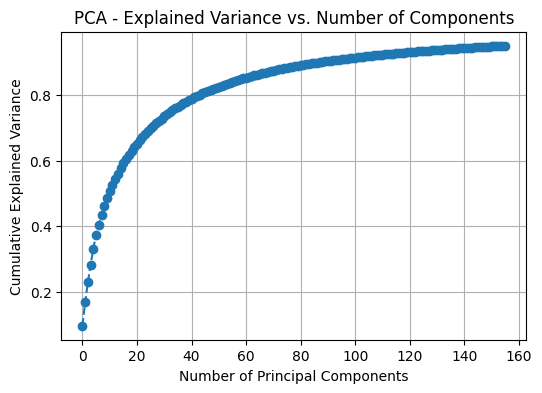

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.grid()
plt.show()

# Visualize PCA in 2D

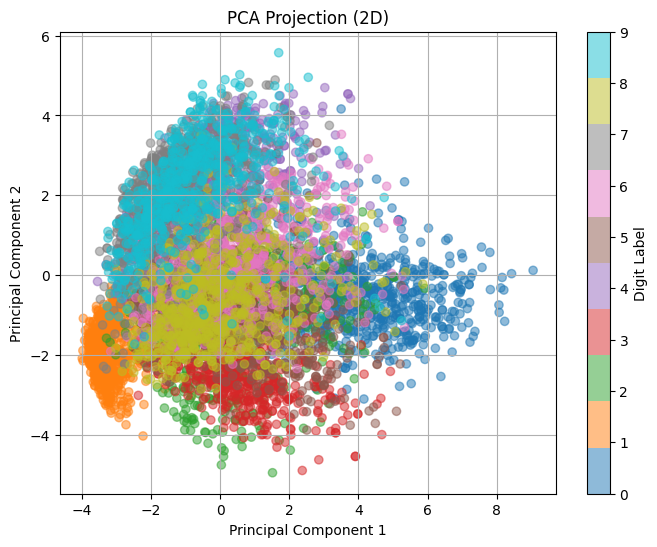

In [ ]:
pca_2d = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca_2d = pca_2d.fit_transform(X_flattened)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D)")
plt.colorbar(label="Digit Label")
plt.grid()
plt.show()


# Visualize PCA in 3D

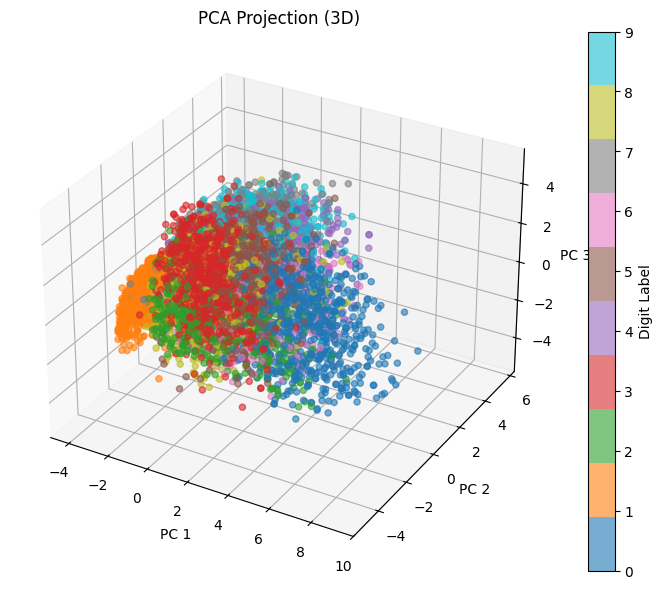

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)  # Reduce to 3D
X_pca_3d = pca_3d.fit_transform(X_flattened)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='tab10', alpha=0.6)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("PCA Projection (3D)")
plt.colorbar(scatter, label="Digit Label")
plt.show()

# Split the PCA-transformed dataset into training (80%) and testing (20%) sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 5600 samples
Test set size: 1400 samples


# Initializing and training a Logistic Regression model on the training set for multi-class classification.


In [ ]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=2)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained successfully!


## Make predictions on the test set

In [ ]:
y_pred = logistic_model.predict(X_test)

# Evaluating the Logistic Regression model's performance using accuracy and classification report on the test set.


In [ ]:
# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy with PCA:", accuracy_score(y_test, y_pred))
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy with PCA: 0.8892857142857142

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       140
           1       0.92      0.96      0.94       140
           2       0.88      0.81      0.84       140
           3       0.89      0.88      0.88       140
           4       0.91      0.91      0.91       140
           5       0.85      0.88      0.87       140
           6       0.96      0.93      0.95       140
           7       0.90      0.92      0.91       140
           8       0.81      0.84      0.82       140
           9       0.87      0.83      0.85       140

    accuracy                           0.89      1400
   macro avg       0.89      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400



# Generating and visualizing the confusion matrix as a heatmap to evaluate the Logistic Regression model's performance.


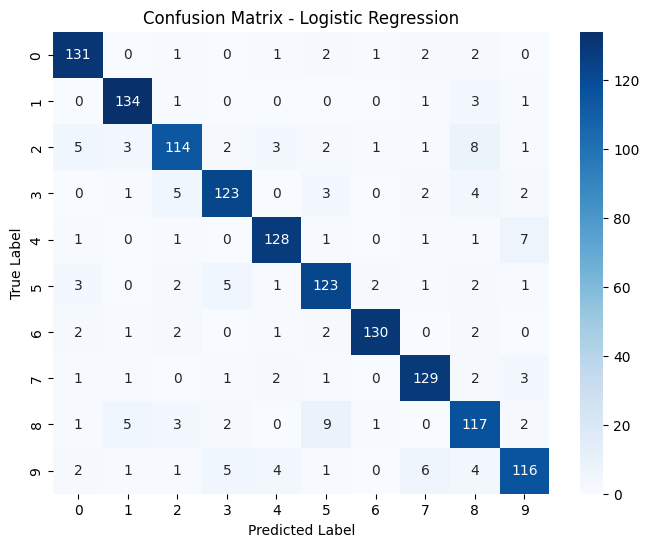

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Reshaping images for CNN input, applying one-hot encoding to labels, and splitting the dataset into training and testing sets.


In [ ]:
# Reshape images to (28, 28, 1) for CNN
X_reshaped = X.reshape(X.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_onehot = to_categorical(y, num_classes=10)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=2, stratify=y)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (5600, 28, 28, 1), Training labels shape: (5600, 10)
Testing data shape: (1400, 28, 28, 1), Testing labels shape: (1400, 10)


# Defining and compiling a CNN model for digit classification, including convolutional, pooling, and dense layers.


In [ ]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN model with training data, using 20% of it for validation, over 10 epochs with a batch size of 32.


In [ ]:
# Train the model
history = cnn_model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5254 - loss: 1.4065 - val_accuracy: 0.9446 - val_loss: 0.2175
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9038 - loss: 0.3390 - val_accuracy: 0.9661 - val_loss: 0.1401
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9435 - loss: 0.2180 - val_accuracy: 0.9723 - val_loss: 0.1114
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9443 - loss: 0.1634 - val_accuracy: 0.9732 - val_loss: 0.1024
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9557 - loss: 0.1348 - val_accuracy: 0.9768 - val_loss: 0.0889
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9660 - loss: 0.1067 - val_accuracy: 0.9750 - val_loss: 0.0919
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9754 - loss: 0.0844 - val_accuracy: 0.9795 - val_loss: 0.0795
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9724 - loss: 0.0788 - val_accu

# Evaluating the CNN model's performance on the test data and generating a detailed classification report for model assessment.



In [ ]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

# Generate classification report
y_pred = cnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
print(classification_report(y_true_classes, y_pred_classes))

44/44 - 0s - 11ms/step - accuracy: 0.9700 - loss: 0.1148
Test accuracy: 0.97
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       140
           1       0.96      0.98      0.97       140
           2       0.96      0.94      0.95       140
           3       0.99      0.97      0.98       140
           4       0.97      0.99      0.98       140
           5       0.97      1.00      0.99       140
           6       0.99      0.98      0.98       140
           7       0.93      0.99      0.96       140
           8       0.99      0.93      0.96       140
           9       0.97      0.96      0.96       140

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



# Plotting training history to visualize the accuracy and loss trends for both training and validation sets over epochs.



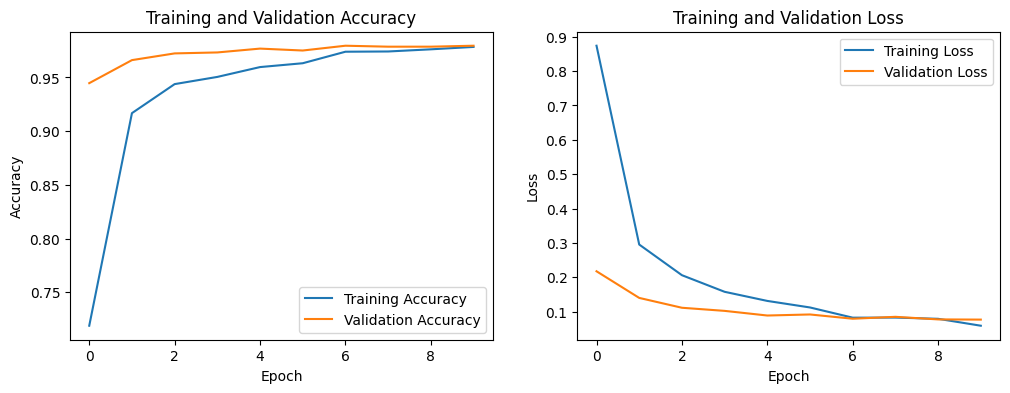

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


# Visualizing the confusion matrix to analyze the CNN model's classification performance across different digit classes.


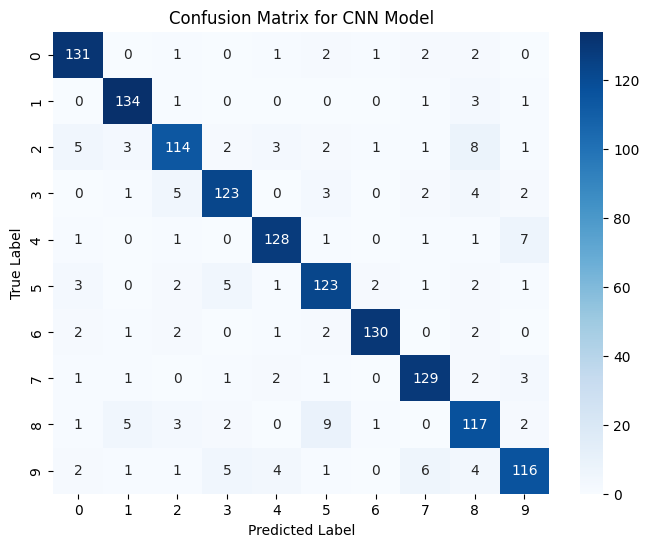

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN Model")
plt.show()

# Prepare a small batch of images and labels for adversarial attack testing by selecting the first 5 samples.


In [ ]:
# Ensure images are in the correct format for CNN (28x28x1)
X_test = X_reshaped  # Use the reshaped images from your dataset
y_test_onehot = y_onehot  # Use the one-hot encoded labels

# Select a small batch (first 5 images) for testing adversarial attacks
sample_images = X_test[:5]
sample_labels = y_test_onehot[:5]

# Function to generate adversarial examples using the FGSM attack


In [ ]:
# Defined the FGSM attack function
def fgsm_attack(model, images, labels, epsilon):
    # Convert images to TensorFlow variables
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

    # Compute the gradient of the loss w.r.t images
    gradient = tape.gradient(loss, images)
    signed_grad = tf.sign(gradient)  # Take the sign of the gradient

    # Generate adversarial examples
    adv_images = images + epsilon * signed_grad
    adv_images = tf.clip_by_value(adv_images, 0, 1)  # Ensure valid pixel range

    return adv_images.numpy()


# Function to generate adversarial examples using the PGD attack (Projected Gradient Descent)

In [ ]:
#Defined the PGD attack function
def pgd_attack(model, images, labels, epsilon, alpha, iterations):
    adv_images = images.copy()  # Start with clean images

    for i in range(iterations):
        adv_images = tf.convert_to_tensor(adv_images, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(adv_images)
            predictions = model(adv_images)
            loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

        # Compute gradient
        gradient = tape.gradient(loss, adv_images)
        signed_grad = tf.sign(gradient)

        # Apply perturbation
        adv_images = adv_images + alpha * signed_grad
        perturbation = tf.clip_by_value(adv_images - images, -epsilon, epsilon)  # Ensure total perturbation is bounded
        adv_images = images + perturbation

        adv_images = tf.clip_by_value(adv_images, 0, 1)  # Ensure valid pixel range

    return adv_images.numpy()


# Generate adversarial examples using FGSM and PGD attacks for sample images


In [ ]:
#Generate Adversarial Examples
epsilon = 0.1  # Strength of perturbation for FGSM
alpha = 0.01   # Step size for PGD
iterations = 10  # Number of PGD iterations

# Generate adversarial images
fgsm_images = fgsm_attack(cnn_model, sample_images, sample_labels, epsilon)
pgd_images = pgd_attack(cnn_model, sample_images, sample_labels, epsilon, alpha, iterations)


# Function to display original and adversarial images for comparison.


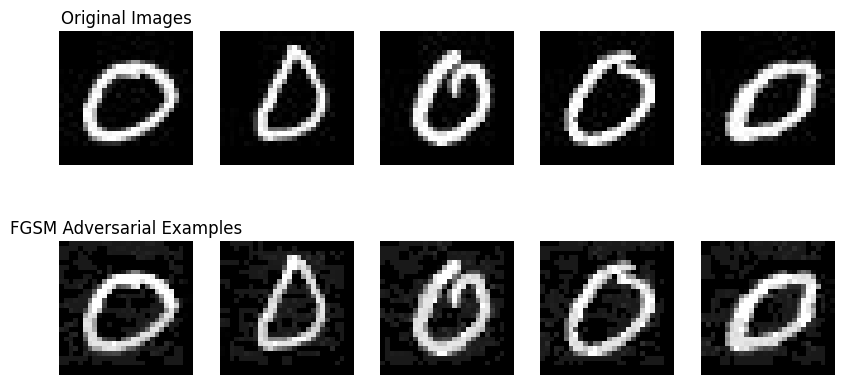

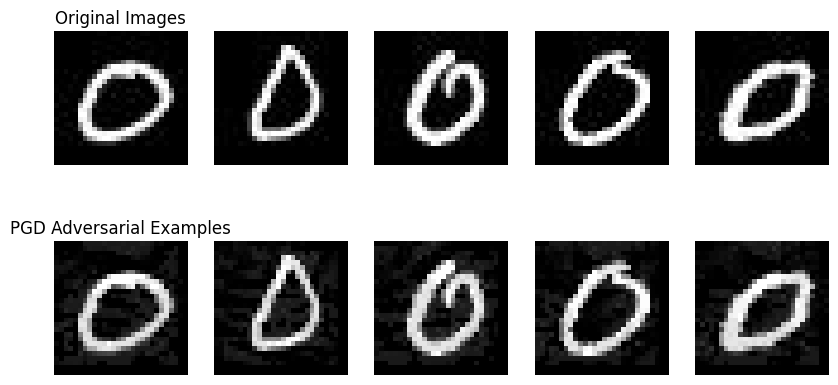

In [ ]:
#Visualize Clean vs. Adversarial Images
def plot_images(original, adversarial, title):
    fig, axes = plt.subplots(2, len(original), figsize=(10, 5))

    for i in range(len(original)):
        # Original image
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')

        # Adversarial image
        axes[1, i].imshow(adversarial[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')

    axes[0, 0].set_title("Original Images")
    axes[1, 0].set_title(title)
    plt.show()

# Show FGSM attack results
plot_images(sample_images, fgsm_images, "FGSM Adversarial Examples")

# Show PGD attack results
plot_images(sample_images, pgd_images, "PGD Adversarial Examples")


# Evaluates the CNN model's performance on adversarial images generated by FGSM and PGD attacks.


In [ ]:
#Evaluate CNN on Adversarial Examples
# Evaluate on FGSM images
fgsm_preds = cnn_model.predict(fgsm_images)
fgsm_acc = np.mean(np.argmax(fgsm_preds, axis=1) == np.argmax(sample_labels, axis=1))
print(f"Model accuracy on FGSM adversarial examples: {fgsm_acc * 100:.2f}%")

# Evaluate on PGD images
pgd_preds = cnn_model.predict(pgd_images)
pgd_acc = np.mean(np.argmax(pgd_preds, axis=1) == np.argmax(sample_labels, axis=1))
print(f"Model accuracy on PGD adversarial examples: {pgd_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Model accuracy on FGSM adversarial examples: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Model accuracy on PGD adversarial examples: 100.00%
